# Problem 1: Support Vector Machines

## Instructions:
1. Please use this q1.ipynb file to complete hw5-q1 about SVMs
2. You may create new cells for discussions or visualizations


### NAME - PRAKHAR BHARDWAJ
### ANDREW ID - prakharb

In [ ]:
# Install cvxopt with pip
# !pip install cvxopt

     --------------------------------------- 12.7/12.7 MB 18.7 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import cvxopt
from cvxopt import matrix, solvers

## a): Linearly Separable Dataset

In [3]:
data = np.loadtxt('clean_lin.txt', delimiter='\t')
x = data[:, 0:2]
y = data[:, 2]

Q = matrix(np.array([[1,0,0],[0,1,0],[0,0,0]]),tc = 'd')
p = matrix(np.array([[0],[0],[0]]),tc = 'd')
g1 = -np.multiply(y,x[:, 0])
g2 = -np.multiply(y,x[:, 1])
g3 = -y
G = matrix(np.column_stack((g1,g2,g3)),tc = 'd')
len_data = len(data)
h = matrix(-np.ones((len_data, 1)),tc = 'd')

solution = cvxopt.solvers.qp(Q,p,G,h)
w = solution['x']
print("training complete \n" ,w)

     pcost       dcost       gap    pres   dres
 0:  1.5173e+00  3.7821e+01  1e+02  2e+00  3e+01
 1:  1.3803e+01  9.6371e+00  3e+01  5e-01  7e+00
 2:  2.1717e+01  1.7415e+01  3e+01  4e-01  6e+00
 3:  3.9769e+01  3.8469e+01  8e+00  7e-02  1e+00
 4:  4.3534e+01  4.3375e+01  5e-01  4e-03  6e-02
 5:  4.3726e+01  4.3699e+01  3e-02  8e-06  1e-04
 6:  4.3723e+01  4.3721e+01  1e-03  4e-07  5e-06
 7:  4.3723e+01  4.3723e+01  1e-05  4e-09  5e-08
Optimal solution found.
training complete 
 [ 6.83e+00]
[ 6.38e+00]
[-5.43e+00]



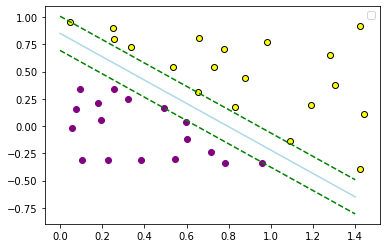

In [4]:
#Decision Boundary
plt.scatter(x[:,0][y == -1],x[:,1][y == -1], c = 'purple')
plt.scatter(x[:,0][y == 1],x[:,1][y == 1], c = 'yellow', edgecolor = 'black')
plt.legend()

points = np.linspace(0, 1.4, 141)
hyperplane = (w[0]*points+w[2])/(-1*w[1])
hyperplane1 = (w[0]*points+w[2]+1)/(-1*w[1])
hyperplane2 = (w[0]*points+w[2]-1)/(-1*w[1])
plt.plot(points, hyperplane, c = 'lightblue')
plt.plot(points, hyperplane1, linestyle='--', c = 'green')
plt.plot(points, hyperplane2, linestyle='--', c = 'green')


## b) and c) : Linearly Non-separable Dataset

     pcost       dcost       gap    pres   dres
 0:  2.0644e+00  5.0524e+01  7e+02  3e+00  6e+02
 1:  1.9690e+01 -2.3059e+01  5e+01  1e-01  3e+01
 2:  1.1116e+01  1.1465e+00  1e+01  2e-02  4e+00
 3:  5.1661e+00  3.9158e+00  1e+00  2e-03  5e-01
 4:  4.6987e+00  4.3010e+00  4e-01  5e-04  1e-01
 5:  4.5752e+00  4.4251e+00  2e-01  1e-04  3e-02
 6:  4.5227e+00  4.4685e+00  5e-02  3e-05  7e-03
 7:  4.5033e+00  4.4844e+00  2e-02  9e-06  2e-03
 8:  4.4945e+00  4.4920e+00  3e-03  7e-07  2e-04
 9:  4.4932e+00  4.4931e+00  3e-05  8e-09  2e-06
10:  4.4931e+00  4.4931e+00  3e-07  8e-11  2e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.3430e+01  2.5866e+02  1e+03  4e+00  7e+01
 1:  1.3083e+02 -3.0700e+01  2e+02  5e-01  8e+00
 2:  5.6266e+01  3.4536e+01  2e+01  3e-02  5e-01
 3:  4.9781e+01  4.0113e+01  1e+01  1e-02  2e-01
 4:  4.6228e+01  4.2703e+01  4e+00  4e-03  6e-02
 5:  4.5200e+01  4.3715e+01  2e+00  1e-03  2e-02
 6:  4.4871e+01  4.3992e+01  9e-01  4e-04  6e-0

(-10.0, 10.0)

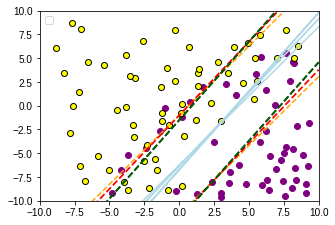

In [16]:
# Load the data set that is not linearly separable
data = np.loadtxt('dirty_nonlin.txt', delimiter='\t')
x = data[:, 0:2]
y = data[:, 2]
len_data = len(data)

# for C = 0.05
C = 0.05
X = np.concatenate((x, np.ones(len_data).reshape(len_data, 1)), axis = 1)
Y = y.reshape(len_data, 1) * 1
q1 = np.array([[1,0,0], [0,1,0], [0,0,0]])
q2 = np.zeros((3, len_data), dtype = int)
q3 = np.zeros((len_data, len_data + 3), dtype = int)
q11 = np.column_stack((q1, q2))
Q = matrix(np.vstack((q11, q3)), tc = 'd') 

# for C = 0.1
C = 0.1
p = np.concatenate((np.zeros(3), C * np.ones(len_data))).reshape(len_data+3, 1)
p = matrix(p, tc = 'd')
G1 = -1 * X * Y
G2 = -1 * np.eye(len_data)
G3 = np.zeros((len_data, 3))                
G11 = np.concatenate((G1, G3))
G21 = np.concatenate((G2, G2))
G = np.concatenate((G11, G21), axis = 1) 
G = matrix(G, tc = 'd')    
h1 = -1 * np.ones(len_data)
h2 = np.zeros(len_data)
h = matrix(np.concatenate((h1, h2)).reshape(2 * len_data, 1))
solution = cvxopt.solvers.qp(Q, p, G, h)
w = np.array(solution['x'])
    
plt.figure(figsize=(5, 3.5))
plt.scatter(x[:, 0][y == -1], x[:, 1][y == -1], c = 'purple')
plt.scatter(x[:, 0][y == 1], x[:, 1][y == 1], c = 'yellow', edgecolor = 'black')
plt.legend()
points = np.linspace(-7.5, 10, 1761)
hyperplane = (w[0] * points + w[2]) / (-1 * w[1])
hyperplane1 = (w[0] * points + w[2] + 1) / (-1 * w[1])
hyperplane2 = (w[0] * points + w[2] - 1) / (-1 * w[1])    
plt.plot(points, hyperplane, c = 'lightblue')
plt.plot(points, hyperplane1, linestyle = '--', c = 'orange')
plt.plot(points, hyperplane2, linestyle = '--', c = 'orange')

# for C = 1
C = 1
p = np.concatenate((np.zeros(3), C * np.ones(len_data))).reshape(len_data+3, 1)
p = matrix(p, tc = 'd')
g1 = -1 * X * Y
g2 = -1 * np.eye(len_data)
g3 = np.zeros((len_data, 3))                
g11 = np.concatenate((g1, g3))
g21 = np.concatenate((g2, g2))
G = np.concatenate((g11, g21), axis = 1) 
G = matrix(G, tc = 'd')
    
h1 = -1 * np.ones(len_data)
h2 = np.zeros(len_data)
h = matrix(np.concatenate((h1, h2)).reshape(2 * len_data, 1))
solution = cvxopt.solvers.qp(Q, p, G, h)
w = np.array(solution['x'])
points = np.linspace(-7.5, 10, 1761)
hyperplane = (w[0] * points + w[2]) / (-1 * w[1])
hyperplane1 = (w[0] * points + w[2] + 1) / (-1 * w[1])
hyperplane2 = (w[0] * points + w[2] - 1) / (-1 * w[1])

plt.style.use('seaborn')

plt.plot(points, hyperplane, c = 'lightblue')
plt.plot(points, hyperplane1, linestyle = '--', c = 'red')
plt.plot(points, hyperplane2, linestyle = '--', c = 'red')

# for C = 100
C = 100
p = np.concatenate((np.zeros(3), C * np.ones(len_data))).reshape(len_data+3, 1)
p = matrix(p, tc = 'd')
G1 = -1 * X * Y
G2 = -1 * np.eye(len_data)
G3 = np.zeros((len_data, 3))                
G11 = np.concatenate((G1, G3))
G21 = np.concatenate((G2, G2))
G = np.concatenate((G11, G21), axis = 1) 
G = matrix(G, tc = 'd')
h1 = -1 * np.ones(len_data)
h2 = np.zeros(len_data)
h = matrix(np.concatenate((h1, h2)).reshape(2 * len_data, 1))
solution = cvxopt.solvers.qp(Q, p, G, h)
w = np.array(solution['x'])
        
points = np.linspace(-7.5, 10, 1761)
hyperplane = (w[0] * points + w[2]) / (-1 * w[1])
hyperplane1 = (w[0] * points + w[2] + 1) / (-1 * w[1])
hyperplane2 = (w[0] * points + w[2] - 1) / (-1 * w[1])
plt.plot(points, hyperplane, c = 'lightblue')
plt.plot(points, hyperplane1, linestyle = '--', c = 'black')
plt.plot(points, hyperplane2, linestyle = '--', c = 'black')

# for C = 1000000
C = 1000000
p = np.concatenate((np.zeros(3), C * np.ones(len_data))).reshape(len_data+3, 1)
p = matrix(p, tc = 'd')
g1 = -1 * X * Y
g2 = -1 * np.eye(len_data)
g3 = np.zeros((len_data, 3))                
g11 = np.concatenate((g1, g3))
g21 = np.concatenate((g2, g2))
G = np.concatenate((g11, g21), axis = 1) 
G = matrix(G, tc = 'd')
h1 = -1 * np.ones(len_data)
h2 = np.zeros(len_data)
h = matrix(np.concatenate((h1, h2)).reshape(2 * len_data, 1))
solution = cvxopt.solvers.qp(Q, p, G, h)
w = np.array(solution['x'])

points = np.linspace(-7.5, 10, 1761)
hyperplane = (w[0] * points + w[2]) / (-1 * w[1])
hyperplane1 = (w[0] * points + w[2] + 1) / (-1 * w[1])
hyperplane2 = (w[0] * points + w[2] - 1) / (-1 * w[1])    
plt.plot(points, hyperplane, c = 'lightblue')
plt.plot(points, hyperplane1, linestyle = '--', c = 'darkgreen')
plt.plot(points, hyperplane2, linestyle = '--', c = 'darkgreen')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

### Explain your observations here:

#Observation - 

The decision boundaries for the value of c = 100 and 1000000 gives the overlapping decision boundaries. The weights for both these conditions are also found to be the same. 

We can also observe that the best decision boundaries are for the vlues of c = 100 and 1000000 and our method does not further makes the results better after the value of c reaches 100